In [95]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import random
import cv2

242 185


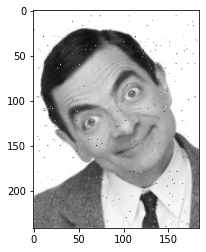

In [96]:
def salt_pepper_nosie():
    img=cv2.imread('mrbean.jpg',0)
    height,width=img.shape
    print(height,width)

    for i in range(0,height,3):
        h=random.randint(0,height)
        r1=random.randint(1,10)
        for k in range(r1):
            r2=random.randint(0,width-1)
            img[h,r2]=random.randint(0,255)

    plt.imshow(img,cmap='gray')       
    cv2.imwrite('salt_pepper.jpg',img)

       

salt_pepper_nosie()



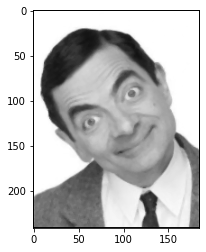

In [97]:
def remove_nosie():
    img=cv2.imread('salt_pepper.jpg',0)
    rows,cols=img.shape
    result=np.zeros(img.shape)

    for i in range(1,rows-1):
        for j in range(1,cols-1):
            small_img=img[i-1:i+2,j-1:j+2]
            small_img_1d=small_img.reshape(9)
            small_im_1d_sorted=np.sort(small_img_1d)
            result[i,j]=small_im_1d_sorted[4]


    plt.imshow(result,cmap='gray')
    cv2.imwrite('remove_noise.jpg',result) 
remove_nosie()

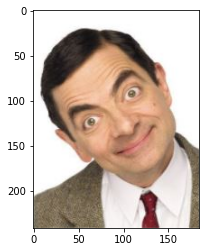

In [98]:
img = plt.imread("mrbean.jpg")
plt.imshow(img)
plt.show()

In [99]:

face_detector = MTCNN()



In [100]:
def draw_facebox_and_keypoints(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        ax.add_patch(rect)
        for key, value in result['keypoints'].items(): 
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    plt.show()

In [101]:


results = face_detector.detect_faces(img)



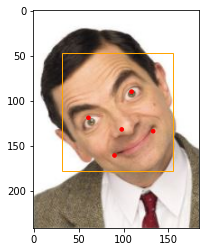

In [102]:
draw_facebox_and_keypoints('mrbean.jpg', results)


In [103]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [104]:
def alignment_procedure(img, left_eye, right_eye):



    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

  

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------


    if b != 0 and c != 0: 

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

In [105]:


detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)



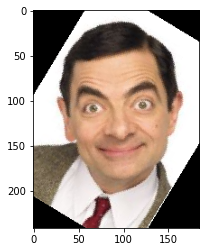

In [106]:


plt.imshow(img)

